# Homework 05

In [2]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import time

## 1 Data set

In [3]:
# Loading the cifar10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()


170500096/170498071 [==============================] - 4s 0us/step


In [4]:
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse",
"ship", "truck"]

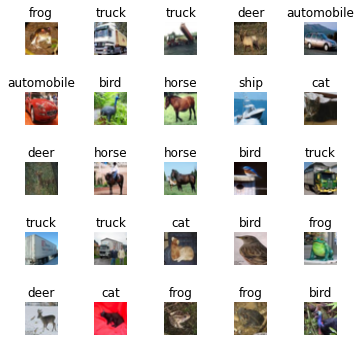

In [5]:
# visualization
fig, ax = plt.subplots(5,5, figsize=(5,5))
fig.tight_layout()
ax = ax.flatten()
for i in range(25):

    # Readout an image and the corresponding label.
    img = train_images[i]
    lbl_number = train_labels[i]
    lbl = labels[lbl_number[0]]

    ax[i].imshow(img)
    ax[i].set_title(lbl)
    ax[i].axis("off")

In [7]:
# input pipeline
train_dataset_images = tf.data.Dataset.from_tensor_slices(train_images)
test_dataset_images = tf.data.Dataset.from_tensor_slices(test_images)

train_dataset_labels = tf.data.Dataset.from_tensor_slices(train_labels[:,0])
test_dataset_labels = tf.data.Dataset.from_tensor_slices(test_labels[:,0])

train_dataset_images = train_dataset_images.map(lambda image: tf.cast(image, np.float32))
test_dataset_images = test_dataset_images.map(lambda image: tf.cast(image, np.float32))

train_dataset_images = train_dataset_images.map(lambda image: (tf.image.per_image_standardization(image)))
test_dataset_images = test_dataset_images.map(lambda image: (tf.image.per_image_standardization(image)))

train_dataset_labels = train_dataset_labels.map(lambda x : tf.one_hot(x, 10))
test_dataset_labels = test_dataset_labels.map(lambda x : tf.one_hot(x, 10))

train_dataset = tf.data.Dataset.zip((train_dataset_images, train_dataset_labels))
test_dataset = tf.data.Dataset.zip((test_dataset_images, test_dataset_labels))

train_dataset = train_dataset.shuffle(50).batch(64)
test_dataset = test_dataset.shuffle(50).batch(64)

## 2 Model

In [51]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

class Model(Model): #generates a CNN with 6 Convolutional Layers and 

  def __init__(self): 
    super(Model, self).__init__()
    #Generating the different Layers in of their application.
    self.cov1 = tf.keras.layers.Conv2D(filters = 16,
                                       kernel_size = 3,
                                       strides = (1,1),
                                       padding = 'same',
                                       activation =  None,
                                       input_shape = (32,32,3)  
                                       )
    self.batchnorm1 = tf.keras.layers.BatchNormalization()
    self.maxpool1 = tf.keras.layers.MaxPool2D(pool_size= (2,2),
                                              strides = (2,2)
                                              )
    self.cov2 = tf.keras.layers.Conv2D(filters = 32,
                                       kernel_size = 3,
                                       strides = (1,1),
                                       padding = 'same',
                                       activation = None
                                       )
    self.batchnorm2 = tf.keras.layers.BatchNormalization()
    self.maxpool2 = tf.keras.layers.MaxPool2D(pool_size= (2,2),
                                              strides = (2,2)
                                              )
    self.dropout2 = tf.keras.layers.Dropout(rate=0.3)
    self.cov3 = tf.keras.layers.Conv2D(filters = 64,
                                       kernel_size = 3,
                                       strides = (1,1),
                                       padding = 'same',
                                       activation = None
                                       )
    self.batchnorm3 = tf.keras.layers.BatchNormalization()
    self.maxpool3 = tf.keras.layers.MaxPool2D(pool_size= (2,2),
                                              strides = (2,2)
                                              )
    self.cov4 = tf.keras.layers.Conv2D(filters = 128,
                                       kernel_size = 3,
                                       strides = (1,1),
                                       padding = 'same',
                                       activation = None
                                       )
    self.batchnorm4 = tf.keras.layers.BatchNormalization()
    self.maxpool4 = tf.keras.layers.MaxPool2D(pool_size= (2,2),
                                              strides = (2,2))
    self.dropout4 = tf.keras.layers.Dropout(rate=0.3)
    self.cov5 = tf.keras.layers.Conv2D(filters = 256,
                                       kernel_size = 3,
                                       strides = (1,1),
                                       padding = 'same',
                                       activation = None
                                       )
    self.batchnorm5 = tf.keras.layers.BatchNormalization()
    self.maxpool5 = tf.keras.layers.MaxPool2D(pool_size= (2,2),
                                              strides = (2,2))
    self.globalpool = tf.keras.layers.GlobalAveragePooling2D()
    self.hidden_layer = tf.keras.layers.Dense(units = 64,
                                              activation = None
                                              )
    self.batchnorm6 = tf.keras.layers.BatchNormalization()
    self.dropout6 = tf.keras.layers.Dropout(rate=0.3)
    self.output_layer = tf.keras.layers.Dense(units = 10,
                                        activation = tf.keras.activations.softmax
                                        )
    
    self.relu = tf.keras.activations.relu

  @tf.function
  def call(self, x, training=True):
    #The Layers feed into each other.
    x = self.cov1(x)
    x = self.batchnorm1(x, training)
    x = self.relu(x)
    x = self.maxpool1(x)
    x = self.cov2(x)
    x = self.batchnorm2(x, training)
    x = self.relu(x)
    x = self.maxpool2(x)
    x = self.dropout2(x, training)
    x = self.cov3(x)
    x = self.batchnorm3(x, training)
    x = self.relu(x)
    x = self.maxpool3(x)
    x = self.cov4(x)
    x = self.batchnorm4(x, training)
    x = self.relu(x)
    x = self.maxpool4(x)
    x = self.dropout4(x, training)
    x = self.cov5(x)
    x = self.batchnorm5(x, training)
    x = self.relu(x)
    x = self.maxpool5(x)
    x = self.globalpool(x)
    x = self.hidden_layer(x)
    x = self.batchnorm6(x, training)
    x = self.relu(x)
    x = self.dropout6(x, training)
    x = self.output_layer(x)
    return x

## 3 Training

In [52]:
#General Parameters
trainforNepochs=30                                   
learning_rate=0.001
running_average_factor = 0.95                           
lossfunction= tf.keras.losses.CategoricalCrossentropy()      #we use categorical cross entropy as lossfunction
optimizer = tf.keras.optimizers.Adam(learning_rate)     #we use ADAM as optimizer

model = Model()                                         #As model we want to use the model from above

In [53]:
def train_step(model, input, target, loss_function, optimizer, training=True):
  # loss_object and optimizer_object are instances of respective tensorflow classes
  with tf.GradientTape() as tape: #we safe the loss in the gradient tape 
    prediction = model(input, training)
    loss = loss_function(target, prediction)
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss 

def test(model, test_data, loss_function, training=False):
  # test over complete test data
  test_accuracy_aggregator = []
  test_loss_aggregator = []

  for (input, target) in test_data:
    prediction = model(input,training)
    sample_test_loss = loss_function(target, prediction).numpy()
    #print(sample_test_loss)
    sample_test_accuracy = np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    sample_test_accuracy = np.mean(sample_test_accuracy)
    test_loss_aggregator.append(sample_test_loss)
    test_accuracy_aggregator.append(np.mean(sample_test_accuracy))

  test_loss = np.mean(test_loss_aggregator)
  test_accuracy = np.mean(test_accuracy_aggregator)

  return test_loss, test_accuracy

In [54]:
# Initialize lists for later visualization.
train_losses = []
test_losses = []
test_accuracies = []

#testing once before we begin, so that be have the first datapoints
test_loss, test_accuracy = test(model, test_dataset, lossfunction)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

#check how model performs on train data once before we begin, so that we have a baseline
train_loss, _ = test(model, train_dataset, lossfunction)
train_losses.append(train_loss)

In [55]:
print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           multiple                  448       
_________________________________________________________________
batch_normalization_36 (Batc multiple                  64        
_________________________________________________________________
max_pooling2d_30 (MaxPooling multiple                  0         
_________________________________________________________________
conv2d_31 (Conv2D)           multiple                  4640      
_________________________________________________________________
batch_normalization_37 (Batc multiple                  128       
_________________________________________________________________
max_pooling2d_31 (MaxPooling multiple                  0         
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0   

In [56]:
# We train for trainforNepochs epochs.
for epoch in range(trainforNepochs):

    #just some fun runtime approximation that you can ignore :D
    if epoch == 0:              #before the first epoch we dont know how much time is going to pass.
      start = time.time()       #what we know is, when we started!
      time_remaining="Unknown"
    else:
      now = time.time()                                         
      time_per_epoch = ((now-start)/epoch)                      #average of the time per epoch
      remaining_epochs = trainforNepochs-epoch                  #numbers of remaining epochs
      time_remaining = round(time_per_epoch*remaining_epochs,0)
    print('Epoch:',str(epoch + 1 ),"of",str(trainforNepochs)+". Time remaining:", time_remaining, "seconds")





    #training (and checking in with training)
    running_average = 0
    for (input,target) in train_dataset:                           #Training the model as long as we have training data
        train_loss = train_step(model, input, target, lossfunction, optimizer)
        running_average = running_average_factor * running_average  + (1 - running_average_factor) * train_loss
    train_losses.append(running_average)

    #testing how good the model performed in the current step
    test_loss, test_accuracy = test(model, test_dataset, lossfunction)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

now = time.time()

print("Finished after",round(now-start,0),"seconds.")

Epoch: 1 of 30. Time remaining: Unknown seconds
Epoch: 2 of 30. Time remaining: 431.0 seconds
Epoch: 3 of 30. Time remaining: 407.0 seconds
Epoch: 4 of 30. Time remaining: 395.0 seconds
Epoch: 5 of 30. Time remaining: 378.0 seconds
Epoch: 6 of 30. Time remaining: 362.0 seconds
Epoch: 7 of 30. Time remaining: 348.0 seconds
Epoch: 8 of 30. Time remaining: 333.0 seconds
Epoch: 9 of 30. Time remaining: 319.0 seconds
Epoch: 10 of 30. Time remaining: 305.0 seconds
Epoch: 11 of 30. Time remaining: 291.0 seconds
Epoch: 12 of 30. Time remaining: 276.0 seconds
Epoch: 13 of 30. Time remaining: 261.0 seconds
Epoch: 14 of 30. Time remaining: 246.0 seconds
Epoch: 15 of 30. Time remaining: 232.0 seconds
Epoch: 16 of 30. Time remaining: 217.0 seconds
Epoch: 17 of 30. Time remaining: 202.0 seconds
Epoch: 18 of 30. Time remaining: 188.0 seconds
Epoch: 19 of 30. Time remaining: 173.0 seconds
Epoch: 20 of 30. Time remaining: 159.0 seconds
Epoch: 21 of 30. Time remaining: 144.0 seconds
Epoch: 22 of 30. Tim

## 4 Visualization

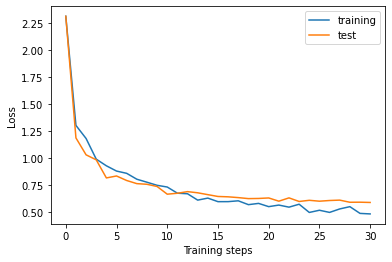

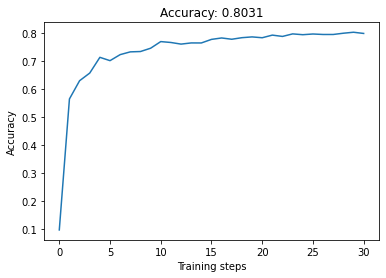

In [57]:
# One plot training and test loss.

plt.figure()
line1, = plt.plot(train_losses)
line2, = plt.plot(test_losses)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend((line1,line2),("training","test"))
plt.show()

# One plot training and test accuracy.
plt.figure()
line1, = plt.plot(test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.title("Accuracy: " + str(np.round(np.max(test_accuracies),4)))
plt.show()